In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
class LF():
    
    def __init__(self,R,K,alpha,gamma,iterations,method):
        """
        R(ndarray): Rating Matrix
        K(int): Latent Dimension 
        alpha(float): Learning Rate
        gamma(float): Regularization Parameter
        """
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.iterations = iterations
        self.gamma = gamma
        self.alpha = alpha
        self.method = method
        
    def train(self):
        
        self.P = np.random.normal(scale=1/self.K,size=(self.num_users,self.K))
        self.Q = np.random.normal(scale=1/self.K,size=(self.num_items,self.K))
        #initializing biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.global_bias = np.mean(self.R[np.where(self.R!=0)])
        #creating training set
        self.samples = [(i,j,self.R[i,j]) for i in range(self.num_users)
                        for j in range(self.num_items)
                        if self.R[i,j]>0]
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            if self.method == "sgd":
                self.sgd()
            elif self.method == "gd":
                self.gd()
            mse = self.mse()
            training_process.append((i,mse))
            if (i+1)%10==0:
                print("SGD Iteration: %d ; error = %.4f" %(i+1,mse))
        return training_process
    
    def sgd(self):
        """
        Stochastic Gradient Descent
        """
        for i,j,r in self.samples:
            # compute prediction and errors
            prediction = self.predict(i,j)
            error = r-prediction
            # update biases
            # Update biases
            self.b_u[i] += self.alpha * (error - self.gamma * self.b_u[i])
            self.b_i[j] += self.alpha * (error - self.gamma * self.b_i[j])
            # update user and item ith and jth row with the corresponding gradient
            self.P[i,:] += -self.alpha*(-2*error*self.Q[j,:] + self.gamma*self.P[i,:])
            self.Q[j,:] += -self.alpha*(-2*error*self.P[i,:] + self.gamma*self.Q[j,:])
            
    def mse(self):
        # calculating the mean square loss between predicted and the actual
        xs,ys =self.R.nonzero()
        predicted = self.full_mat()
        e=0
        for x,y in zip(xs,ys):
            e += (R[x,y]-predicted[x,y])**2
        return(np.sqrt(e)/len(xs))
    
    def predict(self,i,j):
        # predict the (i,j)th rating using Pi and Qj
        prediction = self.global_bias + self.b_u[i] + self.b_i[j] + self.P[i,:].dot(self.Q[j,:].T)
        return prediction
    
    def full_mat(self):
        #predicting the full rating matrix using P and Q
        return(self.global_bias + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T))
     
    def gd(self): 
        #update bias
        for i, j, r in self.samples:
            # Compute prediction and error
            prediction = self.predict(i,j)
            e = r-prediction
            self.b_u[i] += self.alpha * (e - self.gamma * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.gamma * self.b_i[j])
        
        # first calculate the update term that is the gradient with respect to each row
 
        xs,ys = self.R.nonzero()
        X = np.unique(xs)
        Y = np.unique(ys)
       
        for i in X:
            temp=0
            for j in Y:
                error = self.R[i,j] - self.predict(i,j)
                temp += -2*error*self.Q[j,:] 
                #print(temp.shape)
            temp += self.gamma*self.P[i,:]
            self.P[i,:] += -self.alpha*temp
        
        for j in Y:
            temp=0
            for i in X:
                error = self.R[i,j] - self.predict(i,j)
                temp += -2*error*self.P[i,:] 
            temp +=self.gamma*self.Q[j,:]
            self.Q[j,:] += -self.alpha*temp
        

SGD Iteration: 10 ; error = 0.1676
SGD Iteration: 20 ; error = 0.0902
SGD Iteration: 30 ; error = 0.0681
SGD Iteration: 40 ; error = 0.0528
SGD Iteration: 50 ; error = 0.0424
SGD Iteration: 60 ; error = 0.0363
SGD Iteration: 70 ; error = 0.0320
SGD Iteration: 80 ; error = 0.0286
SGD Iteration: 90 ; error = 0.0258
SGD Iteration: 100 ; error = 0.0237

P x Q:
[[4.89306927 3.11536912 3.48113356 0.95716651]
 [4.92874011 3.04743376 4.29654761 1.95644534]
 [4.07308866 1.74566748 4.599433   2.07727501]
 [0.94311323 1.03163376 3.01379188 4.93978109]
 [1.11327705 0.51901436 3.22467236 4.1048499 ]
 [5.31340805 2.93970867 4.97428651 1.99676883]
 [4.18265699 2.88474351 2.87597779 1.14617539]
 [1.50824167 1.36442348 3.29336509 4.73089586]
 [0.98925081 1.60806045 2.47877578 4.97365465]
 [2.75378327 0.93558565 4.97046867 3.99026296]
 [4.97700071 3.040492   3.71468092 1.00952913]
 [3.85760694 3.99338105 1.0332621  0.86521633]
 [1.24159333 0.78672921 3.79702918 5.0910374 ]
 [1.32312058 2.78196538 0.4617

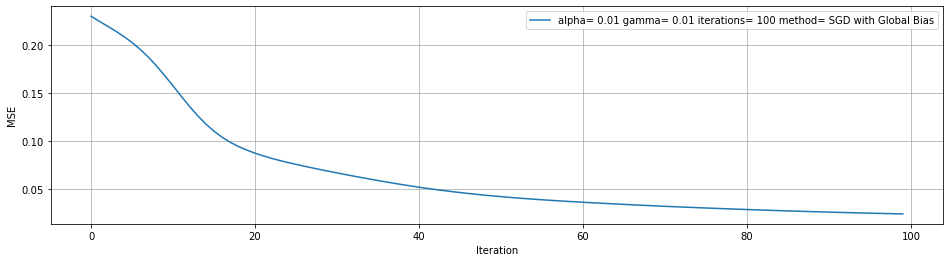

In [7]:
R = np.array([
    [5, 3, 0, 1],
    [5, 3, 0, 2],
    [4, 0, 0, 2],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 3, 5, 2],
    [4, 3, 0, 1],
    [2, 1, 3, 5],
    [1, 0, 0, 5],
    [0, 1, 5, 4],
    [5, 3, 0, 1],
    [4, 0, 1, 1],
    [1, 1, 4, 5],
    [1, 3, 0, 3],
    [1, 1, 2, 4],
])

lf = LF(R, K=2, alpha=0.01, gamma=0.01, iterations=100,method = "sgd")
training_process = lf.train()
print()
print("P x Q:")
print(lf.full_mat())
print()
print("Actual R:")
print(lf.R)
print()
print("Global bias:")
print(lf.global_bias)
print()

x = [x for x,y in training_process]
y = [y for x,y in training_process]
plt.figure(figsize = (16,4))
plt.plot(x,y,label= 'alpha= '+ str(lf.alpha) + ' gamma= '+ str(lf.gamma) + ' iterations= ' + str(lf.iterations) + ' method= SGD with Global Bias')
plt.xlabel("Iteration")
plt.ylabel("MSE")
#plt.xticks(x, x)
plt.grid(axis = "x")
plt.grid(axis = "y")
plt.legend()
plt.show()

SGD Iteration: 10 ; error = 0.2092
SGD Iteration: 20 ; error = 0.1527
SGD Iteration: 30 ; error = 0.0889
SGD Iteration: 40 ; error = 0.0807
SGD Iteration: 50 ; error = 0.0777
SGD Iteration: 60 ; error = 0.0752
SGD Iteration: 70 ; error = 0.0734
SGD Iteration: 80 ; error = 0.0723
SGD Iteration: 90 ; error = 0.0716
SGD Iteration: 100 ; error = 0.0713

P x Q:
[[ 4.97899885  2.92287141  0.06007383  0.88718751]
 [ 5.014838    2.80021155  0.11897804  1.8232622 ]
 [ 3.40562156  1.24617597 -0.64808628  2.41809812]
 [ 1.49494313  0.20880133  0.45327409  4.84249645]
 [ 1.02362419 -0.12777371  0.06387728  3.90650559]
 [ 0.76615338  2.85989779  5.22874461  2.67179652]
 [ 4.30654474  2.6011122   0.26202616  0.96318432]
 [ 1.4656716   1.47610941  2.72136543  4.8103696 ]
 [ 1.0250168  -0.26360292  0.12135331  4.79422328]
 [-0.3487102   1.58867337  4.69632178  4.10230755]
 [ 4.98869393  2.92619374  0.05974831  0.9006603 ]
 [ 3.43657695  1.80198429  0.13417324  1.91885769]
 [ 0.54866003  1.46435872  3.

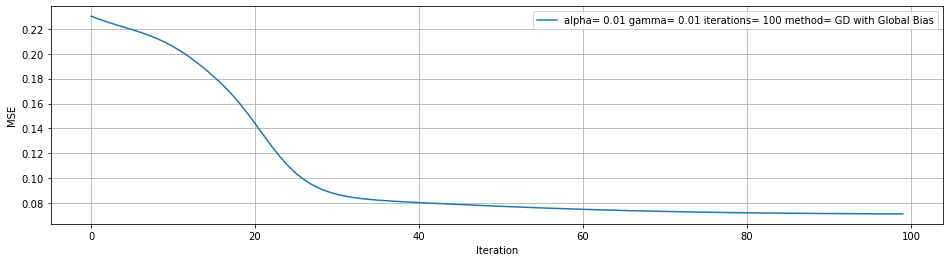

In [8]:
# Gradient Descent
R = np.array([
    [5, 3, 0, 1],
    [5, 3, 0, 2],
    [4, 0, 0, 2],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 3, 5, 2],
    [4, 3, 0, 1],
    [2, 1, 3, 5],
    [1, 0, 0, 5],
    [0, 1, 5, 4],
    [5, 3, 0, 1],
    [4, 0, 1, 1],
    [1, 1, 4, 5],
    [1, 3, 0, 3],
    [1, 1, 2, 4],
])


lf = LF(R, K=2, alpha=0.01, gamma=0.01, iterations=100,method = "gd")
training_process = lf.train()
print()
print("P x Q:")
print(lf.full_mat())
print()
print("Actual R:")
print(lf.R)
print()
print("Global bias:")
print(lf.global_bias)
print()

x = [x for x,y in training_process]
y = [y for x,y in training_process]
plt.figure(figsize = (16,4))
plt.plot(x,y,label= 'alpha= '+ str(lf.alpha) + ' gamma= '+ str(lf.gamma) + ' iterations= ' + str(lf.iterations) + ' method= GD with Global Bias')
plt.xlabel("Iteration")
plt.ylabel("MSE")
#plt.xticks(x, x)
plt.grid(axis = "x")
plt.grid(axis = "y")
plt.legend()
plt.show()